In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',0)

In [34]:
train_df = pd.read_csv('C:\\Users\\Joshi-PC\\Downloads\\train.csv')
test_df = pd.read_csv('C:\\Users\\Joshi-PC\\Downloads\\test.csv')


In [36]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Frequency of each target category')

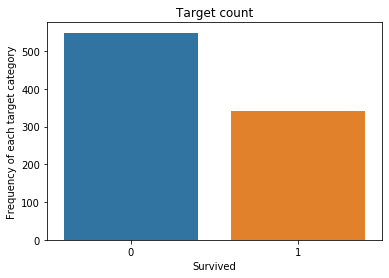

In [42]:
sns.countplot(train_df['Survived'])
plt.title('Target count')
plt.xlabel('Survived')
plt.ylabel('Frequency of each target category')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024557E42848>


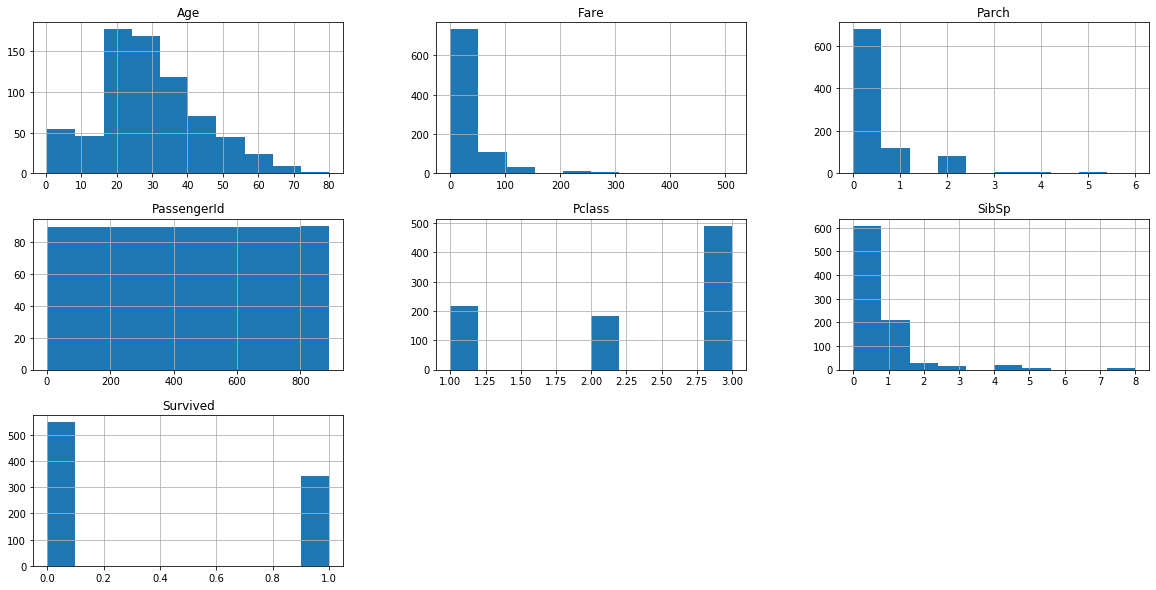

In [43]:
print(train_df.hist(figsize=(20,10)))

In [44]:
round(train_df.isnull().sum()/train_df.shape[0]*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

# ways to handle missing values

In [45]:
train_df['Age'] = train_df.Age.fillna(np.mean(train_df['Age']))
test_df['Age'] = train_df.Age.fillna(np.mean(test_df['Age']))
print(train_df['Age'])
print(test_df['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
413    29.699118
414    44.000000
415    29.699118
416    34.000000
417    18.000000
Name: Age, Length: 418, dtype: float64


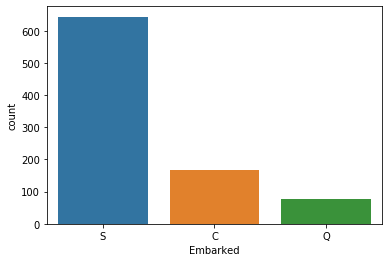

In [46]:
sns.countplot(train_df['Embarked'])

In [48]:
train_df['Embarked'].unique()
train_df['Embarked'] = train_df['Embarked'].replace(np.nan, 'S')

In [51]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [52]:
train_df.drop(['Cabin'], axis = 1,inplace = True)
test_df.drop(['Cabin'], axis = 1,inplace = True)

# Normality check

In [54]:
from scipy.stats import skew

In [55]:
numerical_features   = train_df.select_dtypes(include=np.number).columns
categorical_features = train_df.select_dtypes(include=np.object).columns
print(numerical_features)
print(categorical_features)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [56]:
#train_df.columns

In [57]:
skew(train_df[numerical_features], nan_policy='omit')

array([ 0.        ,  0.47771747, -0.62948588,  0.43375629,  3.68912768,
        2.74448674,  4.77925329])

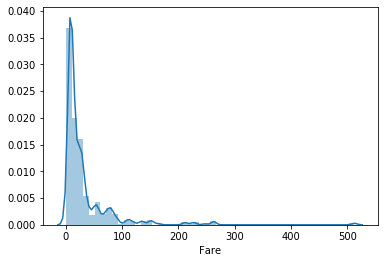

In [59]:
sns.distplot(train_df.Fare)

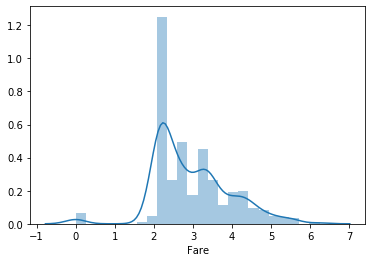

In [60]:
sns.distplot(np.log1p(train_df.Fare)) 

In [61]:
train_df.Fare = np.log1p(train_df.Fare)
test_df.Fare = np.log1p(test_df.Fare)

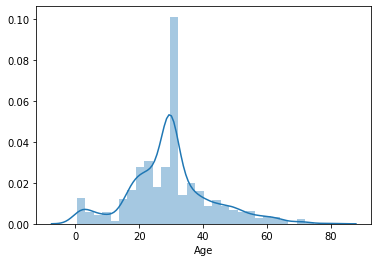

In [62]:
sns.distplot(train_df.Age)

# Encoding handling

In [63]:
train_df.drop(['Name','Ticket'], axis = 1, inplace = True)
test_df.drop(['Name','Ticket'], axis = 1,inplace = True)

In [64]:
train_df.Sex = train_df.Sex.map({'male':1,'female':0})
test_df.Sex = test_df.Sex.map({'male':1,'female':0})

In [65]:
train_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [66]:
train_df_ = pd.get_dummies(train_df)
test_df_ = pd.get_dummies(test_df)

In [68]:
train_df_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,2.110213,0,0,1
1,2,1,1,0,38.0,1,0,4.280593,1,0,0
2,3,1,3,0,26.0,0,0,2.188856,0,0,1
3,4,1,1,0,35.0,1,0,3.990834,0,0,1
4,5,0,3,1,35.0,0,0,2.202765,0,0,1


In [69]:
test_df_.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,22.0,0,0,2.178064,0,1,0
1,893,3,0,38.0,1,0,2.079442,0,0,1
2,894,2,1,26.0,0,0,2.369075,0,1,0
3,895,3,1,35.0,0,0,2.268252,0,0,1
4,896,3,0,35.0,1,1,2.586824,0,0,1


# Bivariate analysis
- correlation check/multi-collinearity check
- pair-plot
- scatter plot
- outliers handing


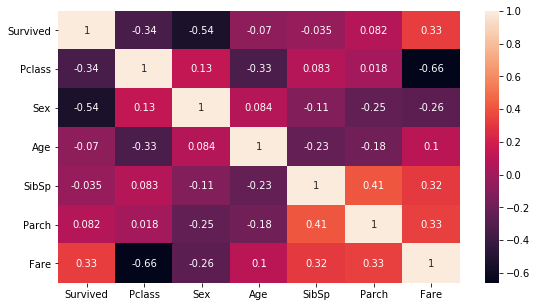

In [70]:
plt.figure(figsize=(9,5))
sns.heatmap(train_df.drop('PassengerId', axis = 1).corr(), annot = True)

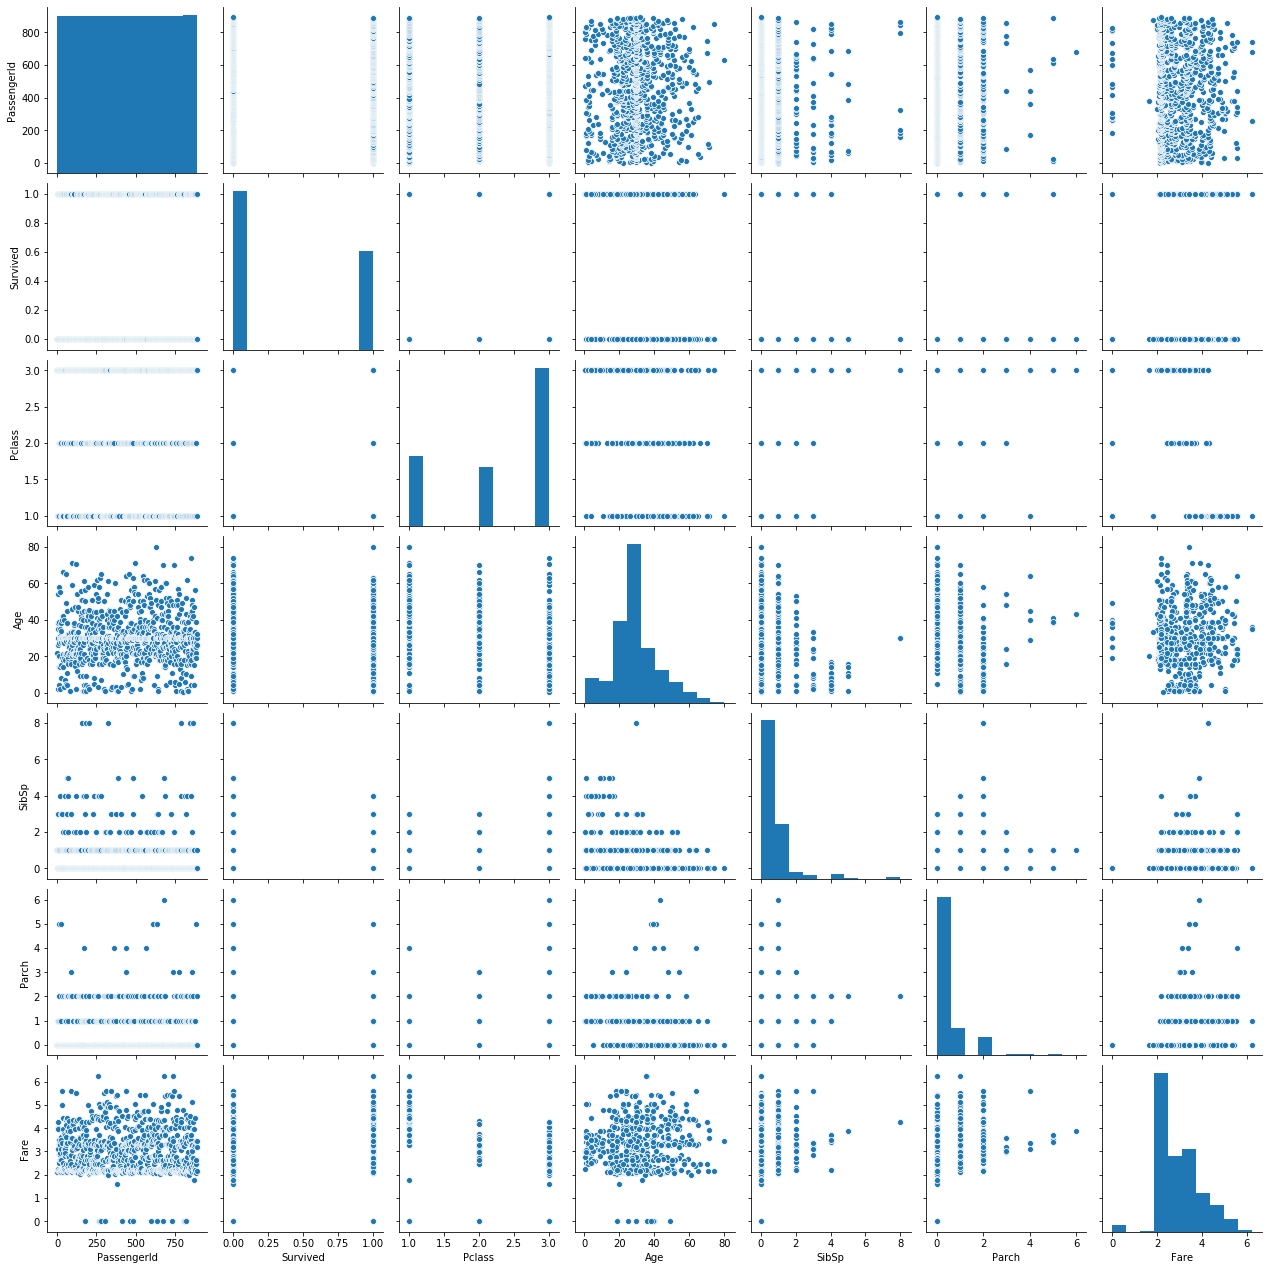

In [71]:
sns.pairplot(train_df[numerical_features])